# PatentSeq

# Background & Description

An easy-to-use script that converts **image-based protein sequences** in patents to 3-letter coded or 1-letter coded **fasta** format.

A large portion of sequences provided in pdf patents are embedded as images, or in an user-unfriendly format difficult for copying/paste. It generally requires much manual work to convert these seqs into fasta. With this script, you can simply take a snapshot of any protein sequences from patents, run it and get your sequence in 3-letter coded and 1-letter coded **fasta** format.

# Dependencies

Install the following modules before running the script:
1. Pillow
2. Pytesseract
3. Biopython

# Code

In [8]:
from PIL import Image
from IPython.display import display
import pytesseract as pyt
import Bio.SeqUtils as su


def PatentSeq(image):
    """
    takes an image file and parse it with pyTesseract
    :param image
            an image file
    :return: tuple
            A tuple of sequences from image: (sequence as string, 1-letter coded, 3-letter coded)
    """
    image=Image.open(image).convert("L")
    display(image)

    seq_str=pyt.image_to_string(image, config="-c preserve_interword_spaces=1x1 --psm 6 --oem 1")

    lst=[]
    for i in seq_str.split():
        if i.isalpha():
            lst.append(i)

    seq3="".join(lst)
    seq1=su.seq1(seq3)
    
    return (seq_str, seq1, seq3)

# Examples of Usage
Example sequence can be found in the images folder. For details see Jupyter Notebook

*Source: Patent US20170114146A1, Seq #29.*

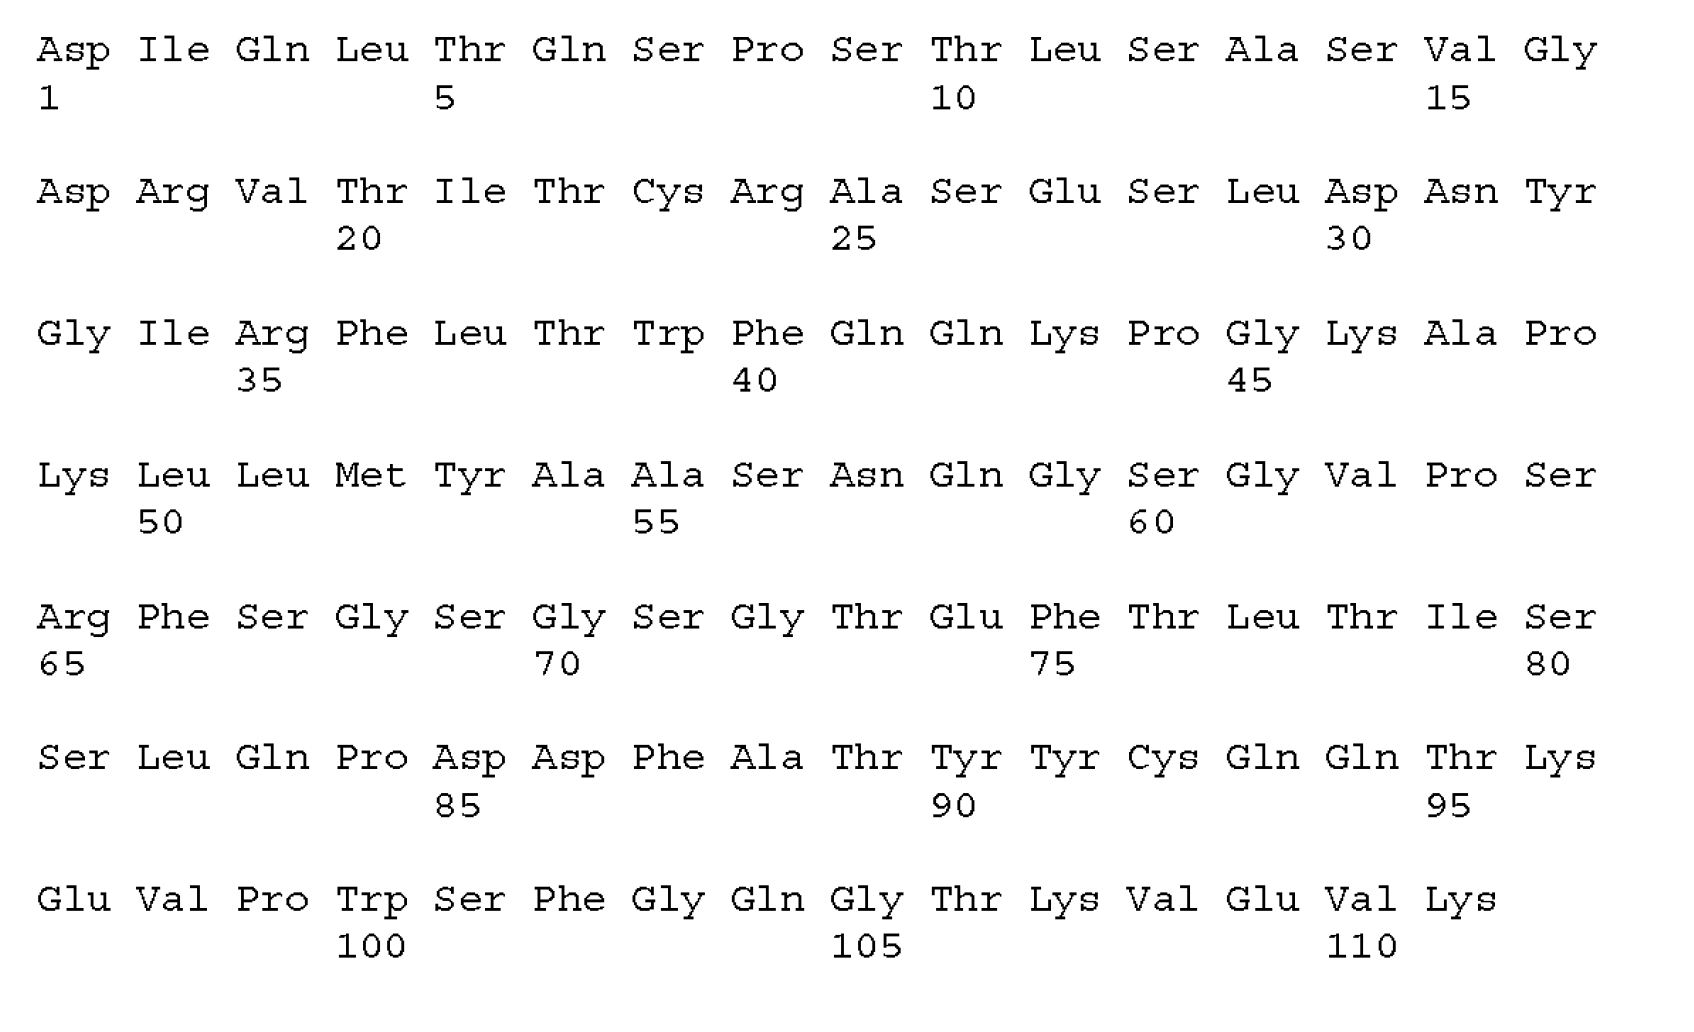

>Seq shown in string 
Asp Ile Gln Leu Thr Gln Ser Pro Ser Thr Leu Ser Ala Ser Val Gly
1                    5                         10                        15
Asp Arg Val Thr Ile Thr Cys Arg Ala Ser Glu Ser Leu Asp Asn Tyr
20                        25                        30
Gly Ile Arg Phe Leu Thr Trp Phe Gln Gln Lys Pro Gly Lys Ala Pro
35                 40                 45
Lys Leu Leu Met Tyr Ala Ala Ser Asn Gln Gly Ser Gly Val Pro Ser
50                 55                 60
Arg Phe Ser Gly Ser Gly Ser Gly Thr Glu Phe Thr Leu Thr Ile Ser
65                        70                        75                        80
Ser Leu Gln Pro Asp Asp Phe Ala Thr Tyr Tyr Cys Gln Gln Thr Lys
85                  90                  95
Glu Val Pro Trp Ser Phe Gly Gln Gly Thr Lys Val Glu Val Lys
100                105                110

>Seq in 1-letter code
DIQLTQSPSTLSASVGDRVTITCRASESLDNYGIRFLTWFQQKPGKAPKLLMYAASNQGSGVPSRFSGSGSGTEFTLTISSLQPDDFATYYCQQTKEVPWSFGQGTKVEVK

>Seq in 3-letter co

In [9]:
result=PatentSeq("Example_Seq1.png")

#print results
print(">Seq shown in string ")
print(result[0])

print("\n>Seq in 1-letter code")
print(result[1])

print("\n>Seq in 3-letter code")
print(result[2])

